<a href="https://colab.research.google.com/github/muksuratchoudhury/GitHubDemo/blob/main/A10_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [282]:
## from dython.nominal import associations ## not supported in google collab, but results presented from visual studio code notebook

In [283]:
from mlxtend.plotting import plot_confusion_matrix

In [284]:
## load the data
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [285]:
df.shape

(8124, 23)

In [286]:
## class: e = edible, p = poisonous
## cap-shape: b = bell,c = conical, x = convex,f = flat, k = knobbed,s = sunken
## cap-surface: f = fibrous,g = grooves,y = scaly,s = smooth
## cap-color: n = brown, b = buff,c = cinnamon, g = gray,r = green, p = pink, u = purple,e = red, w = white, y = yellow
## bruises: t = bruises, f = no
## odor: a = almond,l = anise, c = creosote,y = fishy,f = foul, m = musty, n = none, p = pungent, s = spicy
## gill-attachment: a = attached, d = descending, f = free, n = notched
## gill-spacing: c = close, w = crowded, d = distant
## gill-size: b = broad, n = narrow
## gill-color: k = black,n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, w = white, y = yellow
## stalk-shape: e = enlarging, t = tapering
## stalk-root: b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing
## stalk-surface-above-ring: f = fibrous, y = scaly, k = silky, s = smooth
## stalk-surface-below-ring: f = fibrous, y = scaly, k = silky, s = smooth
## stalk-color-above-ring: n = brown,b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
## stalk-color-below-ring: n = brown,b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
## veil-type: p = partial, u = universal
## veil-color: n = brown, o = orange, w = white, y = yellow
## ring-number: n = none, o = one, t = two
## ring-type: c = cobwebby,e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone
## spore-print-color: k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow
## population: a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary
## habitat: g = grasses,l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [288]:
## no null data, but remember ? is entered as missing data for stalk-root column

In [289]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [290]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [291]:
## large amount of ? = missing data, may drop this column or replace with 'na'

In [292]:
df = df.replace("?",np.nan)

In [293]:
df.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [294]:
for name in df.columns:
    print(name,(df[name]).unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [295]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [296]:
## may drop this feature as there is only the one result for all entries

In [297]:
df.drop('veil-type',axis=1,inplace=True)

**DATA ANALYSIS**

In [298]:
## associations(df,figsize=(20,16), title = "Heatmap of Independance")
## plt.show()

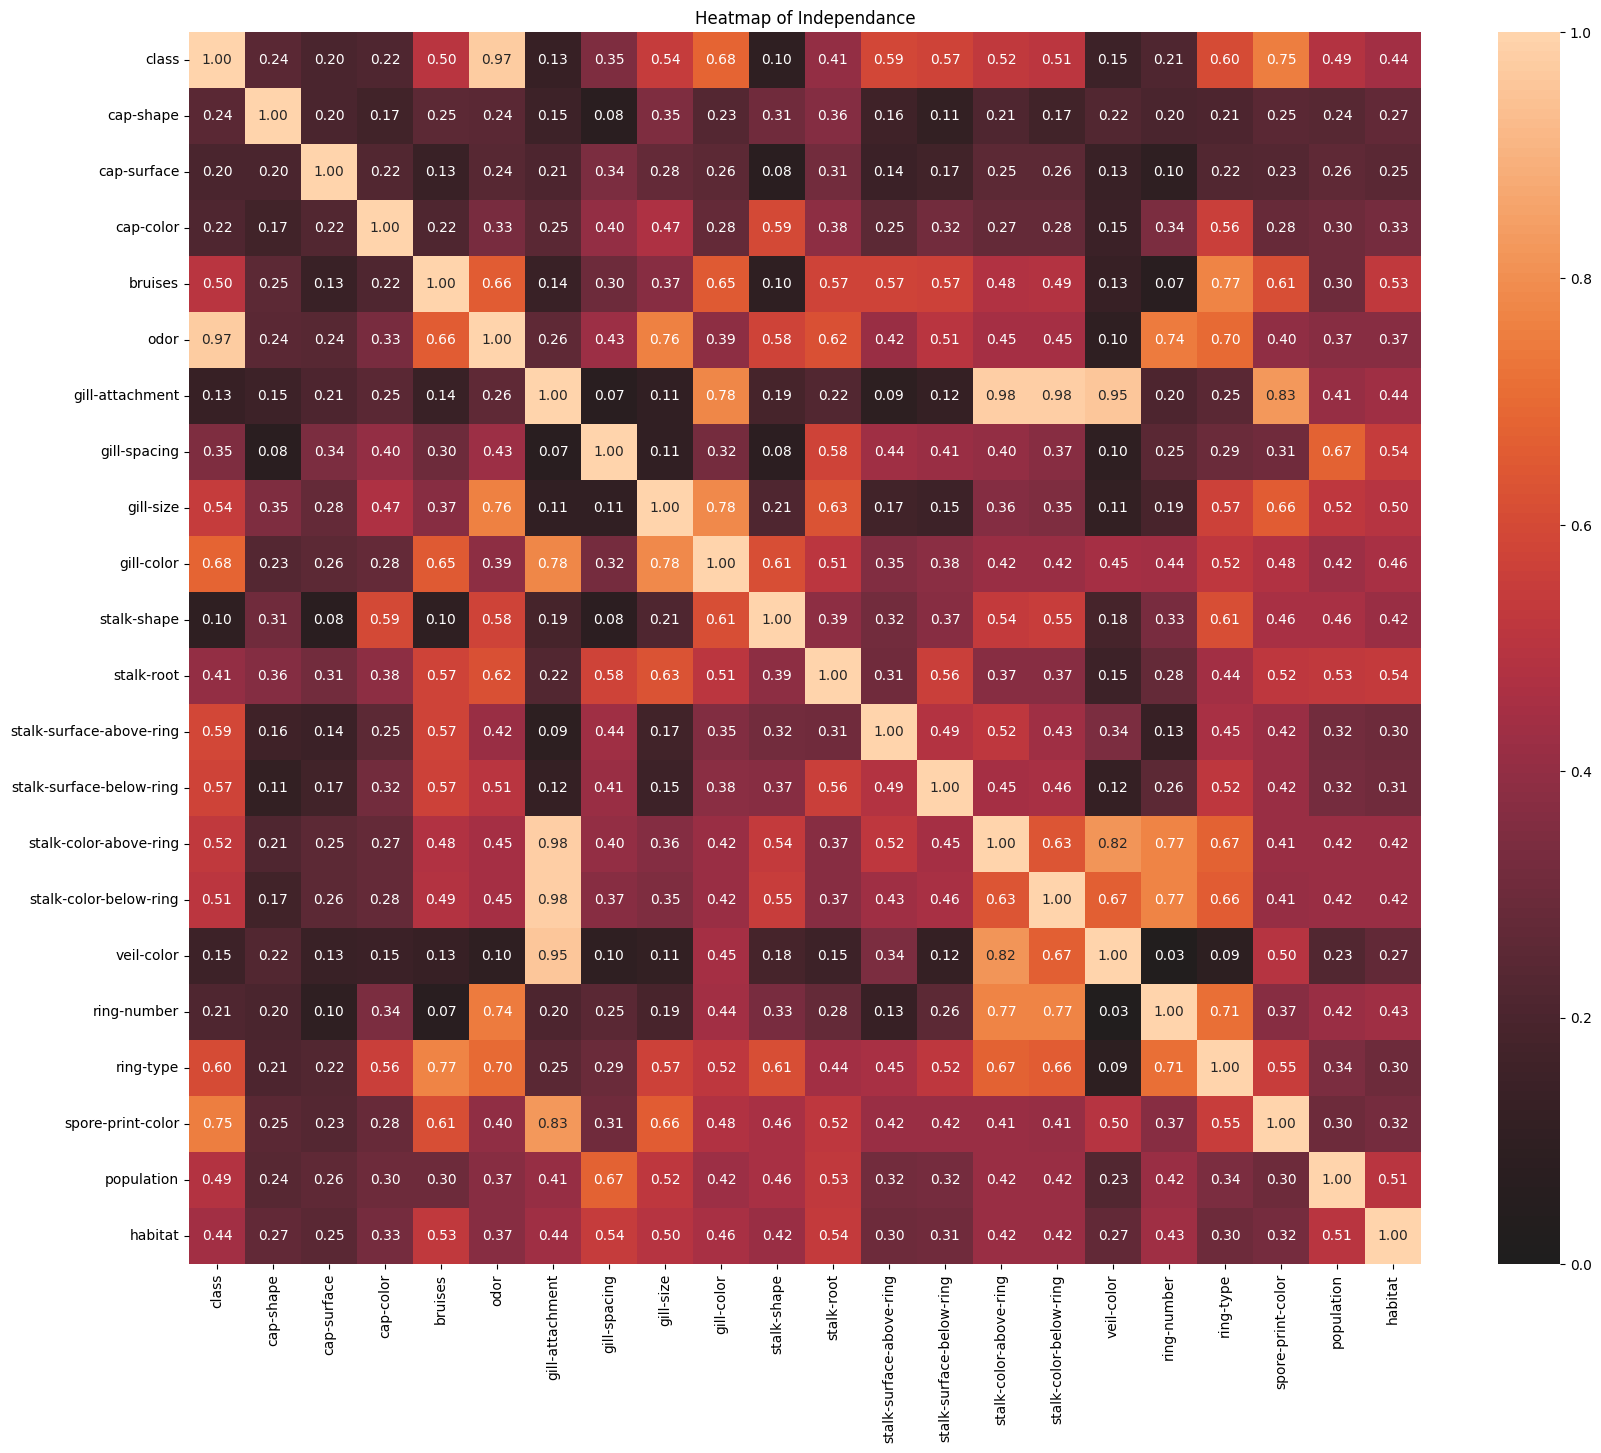

In [299]:
## 97% correlation between odor and mushroom class
## spore print color and gill color are highly correlated to mushroom class (75% and 68%)
## these features are the best predictors for the mushroom class to tell if the mushroom is poisonous or edible
## on the other hand, stalk shape, gill attachment, veil color have very weak correlation to mushroom class, therefore not great predictors

In [300]:
df_class = pd.DataFrame(df)
df_class

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [301]:
df_class.drop('cap-shape',axis=1,inplace=True)
df_class.drop('cap-surface',axis=1,inplace=True)
df_class.drop('cap-color',axis=1,inplace=True)
df_class.drop('bruises',axis=1,inplace=True)
df_class.drop('gill-attachment',axis=1,inplace=True)
df_class.drop('gill-spacing',axis=1,inplace=True)
df_class.drop('gill-size',axis=1,inplace=True)
df_class.drop('stalk-shape',axis=1,inplace=True)
df_class.drop('stalk-root',axis=1,inplace=True)
df_class.drop('stalk-surface-above-ring',axis=1,inplace=True)
df_class.drop('stalk-surface-below-ring',axis=1,inplace=True)
df_class.drop('stalk-color-above-ring',axis=1,inplace=True)
df_class.drop('stalk-color-below-ring',axis=1,inplace=True)
df_class.drop('veil-color',axis=1,inplace=True)
df_class.drop('ring-number',axis=1,inplace=True)
df_class.drop('ring-type',axis=1,inplace=True)
df_class.drop('population',axis=1,inplace=True)
df_class.drop('habitat',axis=1,inplace=True)

In [302]:
df_class

,class,odor,gill-color,spore-print-color
0,p,p,k,k
1,e,a,k,n
2,e,l,n,n
3,p,p,n,k
4,e,n,k,n
...,...,...,...,...
8119,e,n,y,b
8120,e,n,y,b
8121,e,n,n,b
8122,p,y,b,w


In [303]:
## associations(df_class,figsize=(8,8), title = "Heatmap of Independance")
## plt.show()
## closer look at class and odor 97%

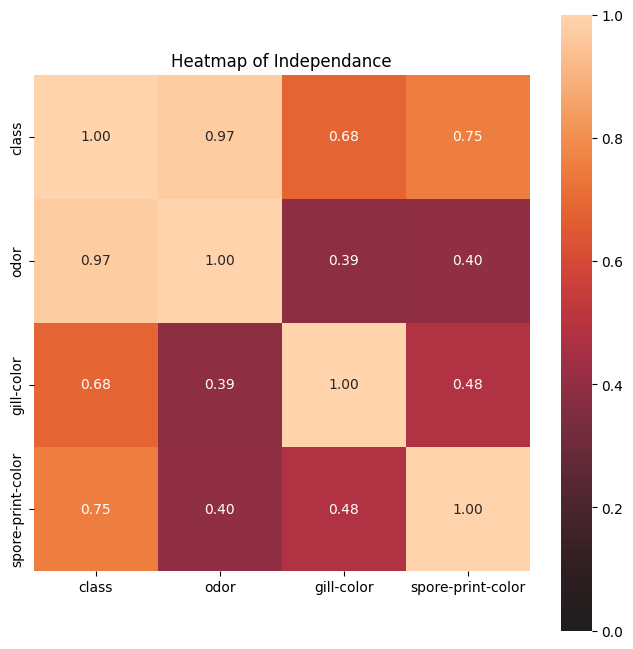

In [304]:
# counts
counts = df.apply(pd.value_counts).fillna(0)

In [305]:
## correlation matrix

corr_matrix = counts.corr()
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.118894,-0.124140,0.222131,-0.098397,-0.093475,-0.070852,-0.081478,-0.092775,0.236250,...,-0.100394,-0.105114,0.187620,0.190546,-0.070773,-0.074878,0.939237,-0.153237,-0.128180,0.072730
cap-shape,-0.118894,1.000000,0.216510,-0.199511,0.467286,0.213262,0.617087,-0.096130,-0.017061,-0.162975,...,0.034648,0.039919,-0.132320,-0.134383,-0.084265,-0.089151,-0.131528,-0.086862,-0.150514,-0.175536
cap-surface,-0.124140,0.216510,1.000000,0.034551,0.326828,0.311360,0.450992,-0.101291,-0.115335,-0.245872,...,0.482104,0.519640,-0.146393,-0.146078,-0.087222,-0.093085,-0.139257,-0.180611,0.305083,-0.182756
cap-color,0.222131,-0.199511,0.034551,1.000000,-0.169414,0.460932,-0.121988,-0.062463,0.195956,0.347920,...,-0.171369,-0.162612,0.288047,0.298091,0.222133,-0.125386,0.121360,0.355289,-0.017372,0.111914
bruises,-0.098397,0.467286,0.326828,-0.169414,1.000000,0.334577,0.804649,-0.080287,-0.091418,-0.215106,...,-0.012500,-0.005219,-0.117139,-0.118965,-0.069738,-0.023964,-0.105926,-0.150995,-0.126305,-0.145274
odor,-0.093475,0.213262,0.311360,0.460932,0.334577,1.000000,0.470769,-0.064609,0.254881,0.115485,...,0.055872,0.064173,-0.051737,-0.039247,-0.088113,-0.100813,-0.067335,0.285148,0.020127,-0.163317
gill-attachment,-0.070852,0.617087,0.450992,-0.121988,0.804649,0.470769,1.000000,-0.057811,-0.065826,-0.154889,...,0.032495,0.043467,-0.084347,-0.085662,-0.050216,-0.053128,-0.072092,-0.108725,-0.088502,-0.104606
gill-spacing,-0.081478,-0.096130,-0.101291,-0.062463,-0.080287,-0.064609,-0.057811,1.000000,-0.075699,-0.084486,...,-0.081915,-0.085767,0.100297,0.098414,0.142373,-0.061096,-0.094924,0.005547,-0.023842,-0.110194
gill-size,-0.092775,-0.017061,-0.115335,0.195956,-0.091418,0.254881,-0.065826,-0.075699,1.000000,0.630770,...,-0.093273,-0.097658,0.020241,0.026567,-0.060468,-0.067469,-0.104826,0.105022,-0.079201,-0.136973
gill-color,0.236250,-0.162975,-0.245872,0.347920,-0.215106,0.115485,-0.154889,-0.084486,0.630770,1.000000,...,-0.148519,-0.155914,0.591671,0.598458,0.342037,-0.135482,0.273357,0.447411,-0.227305,0.078858


<AxesSubplot:title={'center':'Heatmap of Feature Counts'}>

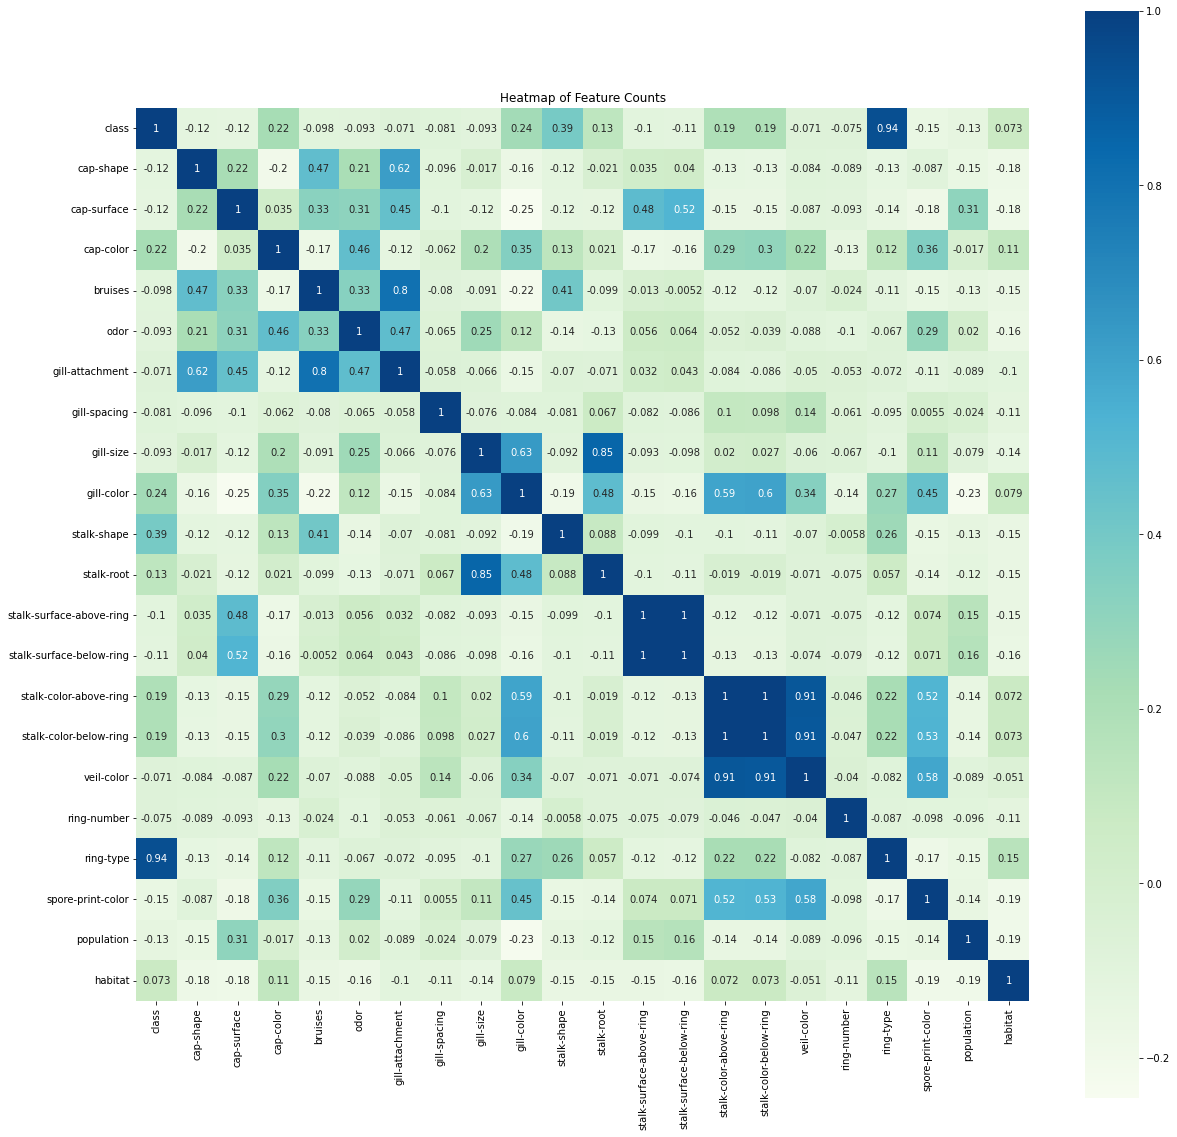

In [306]:
##heatmap

plt.figure(figsize=(20,20))
plt.title("Heatmap of Feature Counts")
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", square=True)

In [307]:
df_class = pd.DataFrame(df['class'].value_counts())

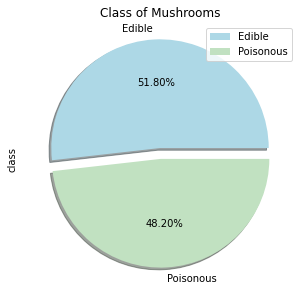

In [308]:
fig, ax=plt.subplots()
# add colours
colors=[ '#ADD8E6','#C1E1C1']
# only "explode" the 2nd slice
explode=(0.1, 0)

df_class.plot(kind='pie', y='class', title = 'Class of Mushrooms', labels = ['Edible', 'Poisonous'], colors = colors , autopct='%1.2f%%', ax=ax, figsize=(5,5), explode=explode, shadow=True)
plt.show()

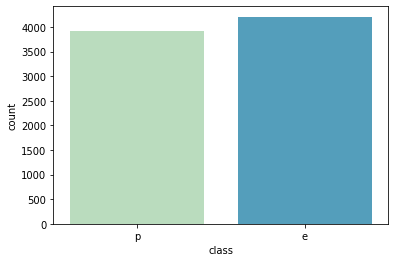

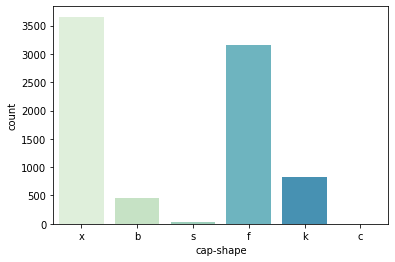

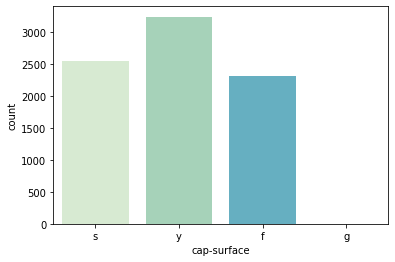

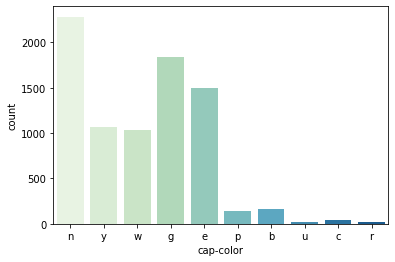

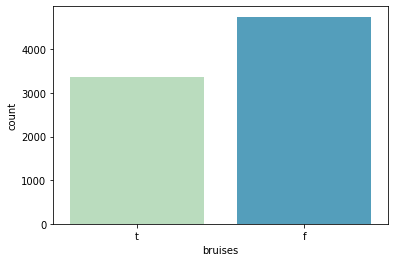

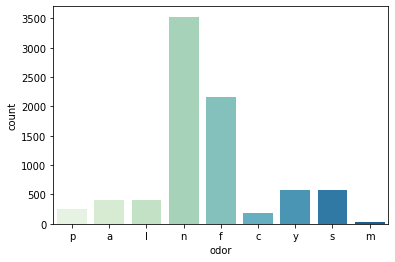

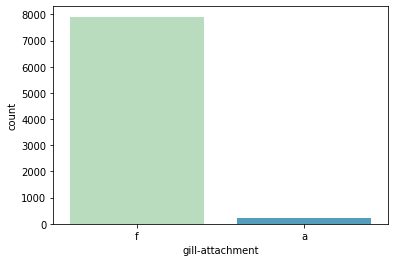

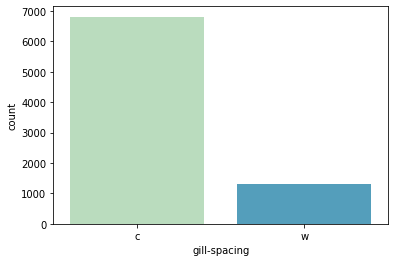

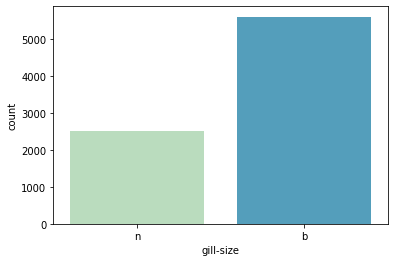

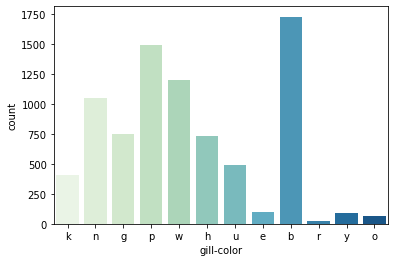

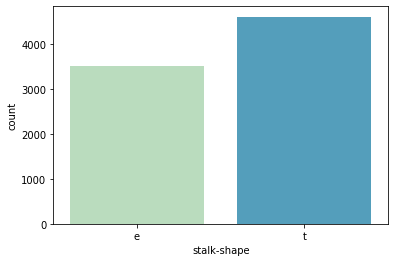

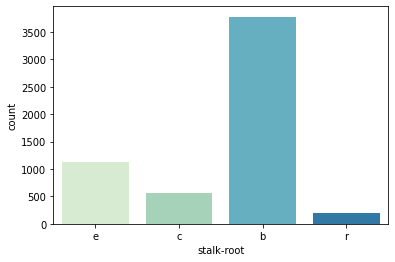

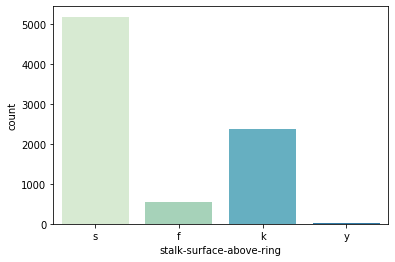

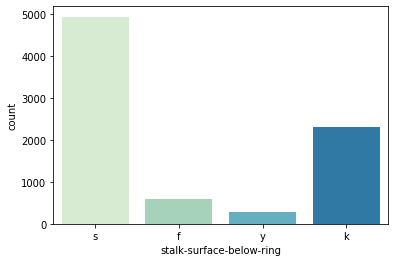

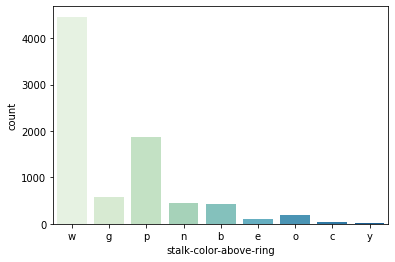

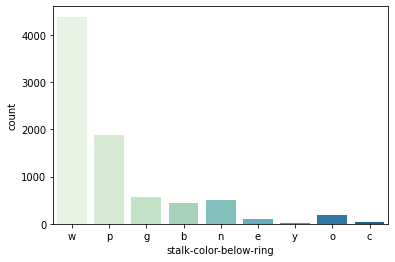

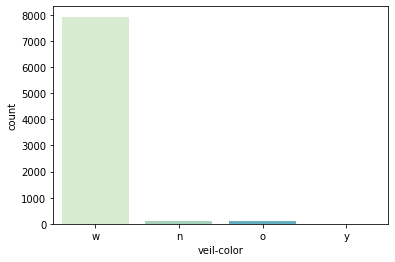

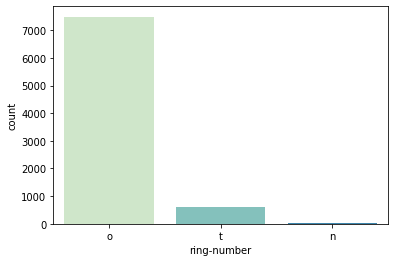

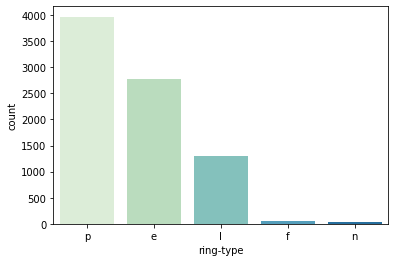

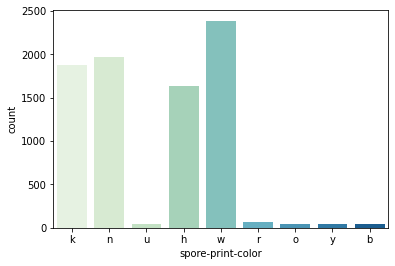

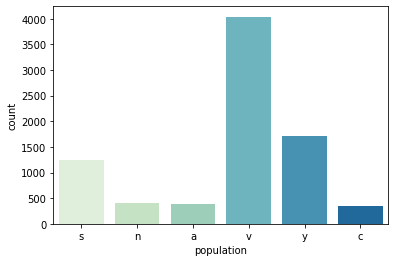

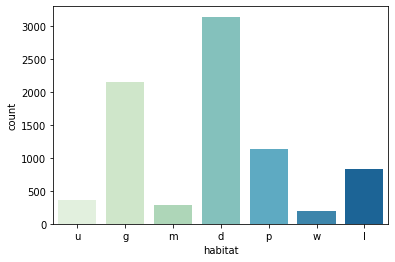

In [309]:
for i in df.columns:
    sns.countplot(data=df,x=i, palette="GnBu")
    plt.show()

In [310]:
df_odor = pd.DataFrame(df['odor'].value_counts())

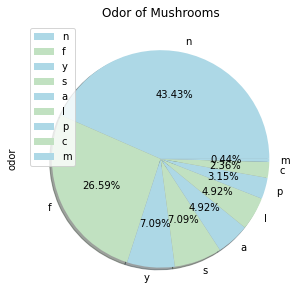

In [311]:
fig, ax=plt.subplots()
# add colours
colors=[ '#ADD8E6','#C1E1C1']

df_odor.plot(kind='pie', y='odor', title = 'Odor of Mushrooms', autopct='%1.2f%%', ax=ax, figsize=(5,5), colors=colors, shadow=True)
plt.show()

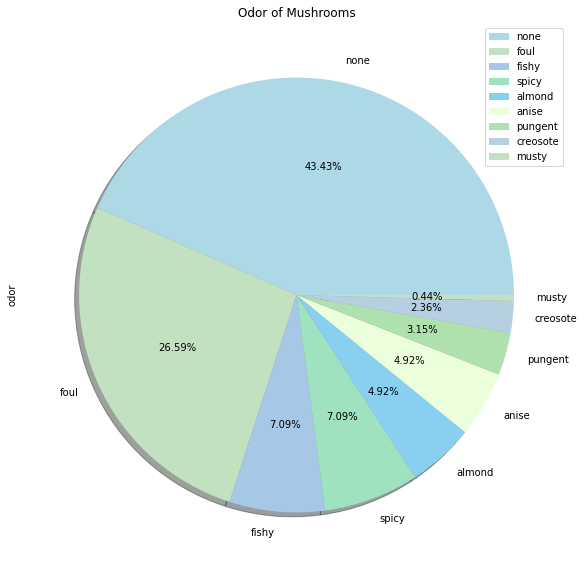

In [312]:
fig, ax=plt.subplots()
# add colours
colors=[ '#ADD8E6','#C1E1C1', '#A7C7E7', '#9FE2BF', '#89CFF0', '#ECFFDC', '#AFE1AF', '#B6D0E2', '#C1E1C1']
## odor: a = almond,l = anise, c = creosote,y = fishy,f = foul, m = musty, n = none, p = pungent, s = spicy
df_odor.plot(kind='pie', y='odor', title = 'Odor of Mushrooms', labels = ['none', 'foul', 'fishy', 'spicy', 'almond', 'anise', 'pungent', 'creosote', 'musty'], autopct='%1.2f%%', ax=ax, figsize=(10,10), colors=colors, shadow=True)
plt.show()


<AxesSubplot:title={'center':'Distribution of Mushroom Class by Odor'}, xlabel='class', ylabel='count'>

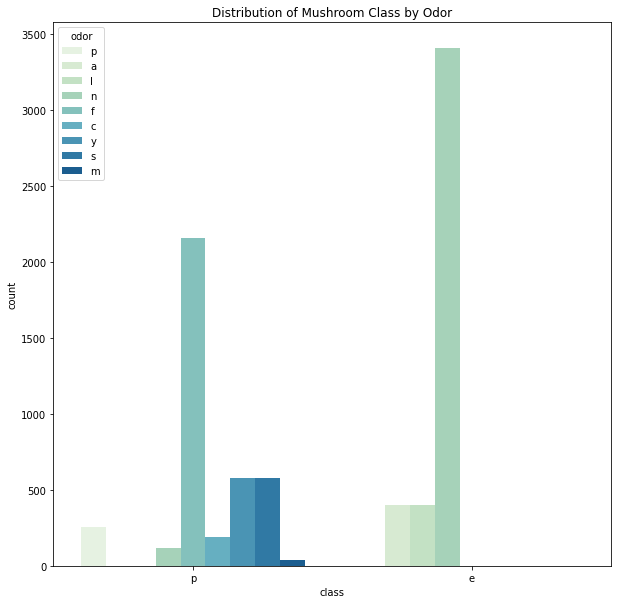

In [313]:
## distribution of mushroom class by odor

plt.figure(figsize=(10, 10))
plt.subplot().set_title('Distribution of Mushroom Class by Odor')
# labels = labels['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty']
sns.countplot(x='class', hue='odor', palette='GnBu', data=df)

<AxesSubplot:title={'center':'Distribution of Odor by Mushroom Class'}, xlabel='odor', ylabel='count'>

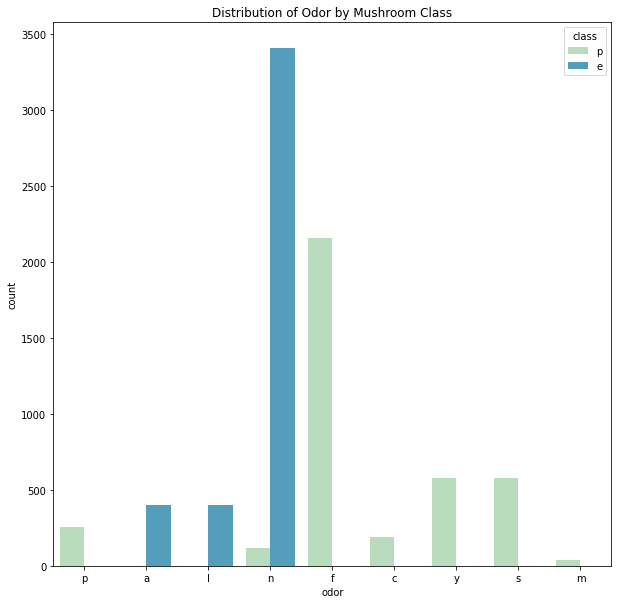

In [314]:
## distribution of mushroom class by odor

plt.figure(figsize=(10, 10))
plt.subplot().set_title('Distribution of Odor by Mushroom Class')
# labels = labels['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty']
sns.countplot(x='odor', hue='class', palette='GnBu', data=df)

<AxesSubplot:title={'center':'Distribution of Spore Print Colour by Mushroom Class'}, xlabel='spore-print-color', ylabel='count'>

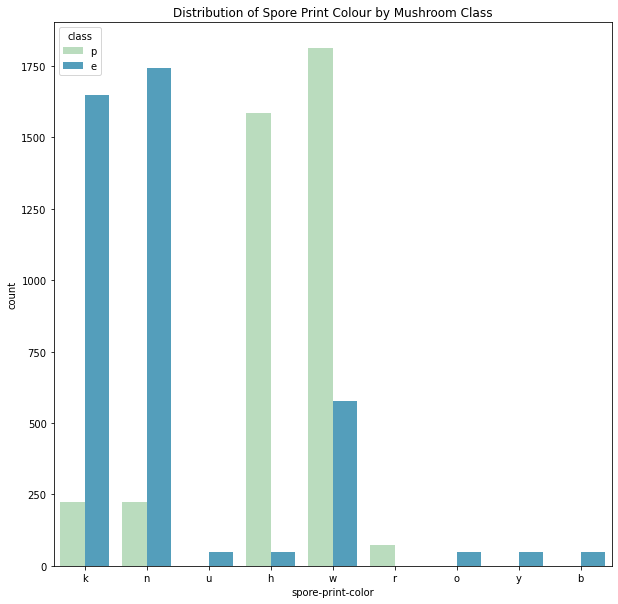

In [315]:
## distribution of mushroom class by odor

plt.figure(figsize=(10, 10))
plt.subplot().set_title('Distribution of Spore Print Colour by Mushroom Class')
sns.countplot(x='spore-print-color', hue='class', palette='GnBu', data=df)

<AxesSubplot:title={'center':'Distribution of Gill Colour by Mushroom Class'}, xlabel='gill-color', ylabel='count'>

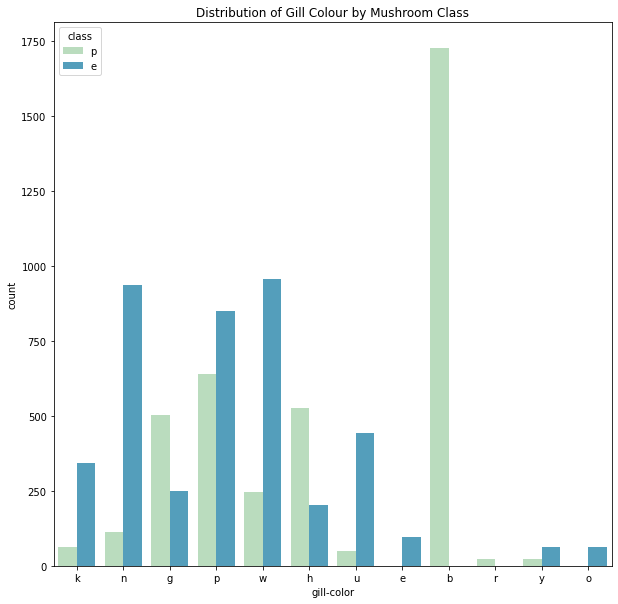

In [316]:
## distribution of mushroom class by odor

plt.figure(figsize=(10, 10))
plt.subplot().set_title('Distribution of Gill Colour by Mushroom Class')
sns.countplot(x='gill-color', hue='class', palette='GnBu', data=df)

**DATA PREPROCESSING**

In [317]:
## define x and y variables

X=df.drop('class',axis=1)
y=df['class'] 

In [318]:
## convert data to numerical and arrays
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

In [319]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [320]:
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [321]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [322]:
## train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [323]:
## RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [324]:
##  make the prediction
y_pred_rf = rf.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [325]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [280]:
## evaluate the model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

## CONFUSION MATRIX
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

print(accuracy_rf)
print(conf_mat_rf)

1.0
[[1255    0]
 [   0 1183]]


In [326]:
## LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [327]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [328]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat_LR = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat_LR)

0.9552912223133716
[[1214   41]
 [  68 1115]]


In [329]:
## NAIVE BAYES

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [330]:
## predict the test set

y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [331]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9265791632485644
[[1170   85]
 [  94 1089]]


In [332]:
## K-Nearest Neighbours

Knn_model = KNeighborsClassifier(n_neighbors=5)

In [333]:
##train my model
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [334]:
## Make prediction

y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [335]:
## Evaluate the knn model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(accuracy_knn)
print(conf_mat_knn)

0.9987694831829368
[[1254    1]
 [   2 1181]]


In [336]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [337]:
## training my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [338]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [339]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [340]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [341]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [342]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)

print(accuracy_gini)
print(conf_mat_gini)

0.9626743232157506
[[1201   54]
 [  37 1146]]


In [343]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)

print(accuracy_entropy)
print(conf_mat_entropy)

0.9626743232157506
[[1201   54]
 [  37 1146]]


In [344]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)

print(accuracy_max_depth)
print(conf_mat_max_depth)

0.98318293683347
[[1227   28]
 [  13 1170]]


In [345]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [346]:
#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [347]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [348]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [349]:
## make a dataframe prediction for sigmoid kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
2433,0,1
2434,1,1
2435,0,1
2436,0,0


In [350]:
## make a dataframe prediction for rbf kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2433,0,0
2434,1,1
2435,0,0
2436,0,0


In [351]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.9692370795734209
Sigmoid kernel Accuracy: 0.46800656275635766
rbf kernelAccuracy: 0.9958982772764561


In [353]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[1214   41]
 [  34 1149]]
[[635 620]
 [677 506]]
[[1255    0]
 [  10 1173]]


<AxesSubplot:>

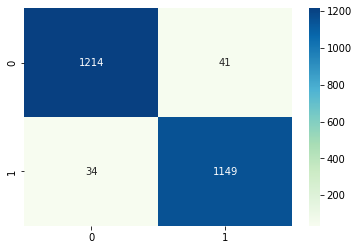

In [354]:
sns.heatmap(conf_mat_linear, annot=True, cmap='GnBu', fmt='.0f')

In [355]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1255
           1       0.97      0.97      0.97      1183

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



<AxesSubplot:>

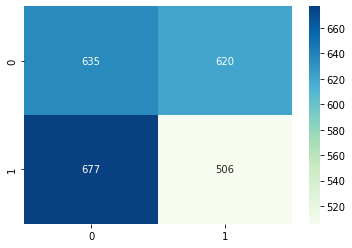

In [356]:
sns.heatmap(conf_mat_sigmoid, annot=True, cmap='GnBu', fmt='.0f')

In [357]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49      1255
           1       0.45      0.43      0.44      1183

    accuracy                           0.47      2438
   macro avg       0.47      0.47      0.47      2438
weighted avg       0.47      0.47      0.47      2438



<AxesSubplot:>

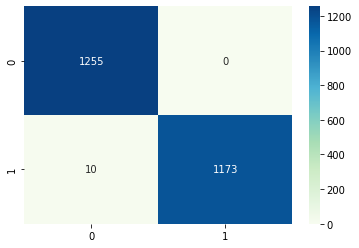

In [358]:
sns.heatmap(conf_mat_rbf, annot=True, cmap='GnBu', fmt='.0f')

In [359]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1255
           1       1.00      0.99      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [360]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.969295


In [361]:
auc = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC: %f' %auc)

AUC: 0.466851


In [362]:
auc = roc_auc_score(y_test, y_pred_rbf)
print('AUC: %f' %auc)

AUC: 0.995773


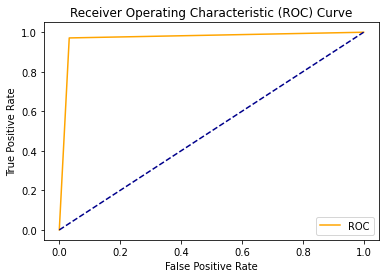

In [363]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

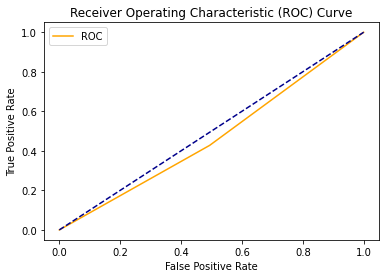

In [364]:
fpr, tpr = roc_curve(y_test, y_pred_sigmoid)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

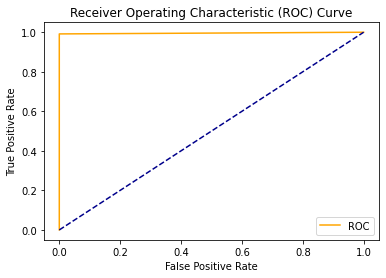

In [365]:
fpr, tpr = roc_curve(y_test, y_pred_rbf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [366]:
## models using x as odor and y as class only 
# 0 edible
# 1 poisonous

In [367]:
## define x and y variables

X = OrdinalEncoder().fit_transform(df['odor'].values.reshape(-1, 1))
y = LabelEncoder().fit_transform(df['class'])

In [368]:
## train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [369]:
## view the shape of the model
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (5686, 1)
Test set: (2438, 1)


In [370]:
model1=DecisionTreeClassifier()

model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9856439704675964

In [371]:
cm = confusion_matrix(model1.predict(X_test),y_test)
cm

array([[1255,   35],
       [   0, 1148]])

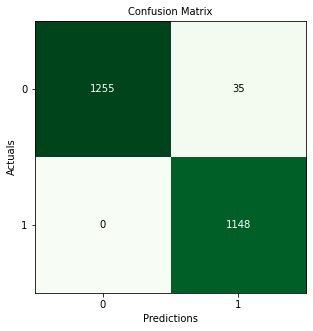

In [372]:
## plot a confusion matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [373]:
## models using x as odor and spore-print-color and gill-color and y as class only 
# 0 edible
# 1 poisonous

In [374]:
## define x and y variables
X = OrdinalEncoder().fit_transform(df[['odor','spore-print-color','gill-color']])
y = LabelEncoder().fit_transform(df['class'])

In [375]:
## train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [376]:
## view the shape of the model
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (5686, 3)
Test set: (2438, 3)


In [377]:
model2=DecisionTreeClassifier()

model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9942575881870386

In [378]:
cm2 = confusion_matrix(model2.predict(X_test),y_test)
cm2

array([[1255,   14],
       [   0, 1169]])

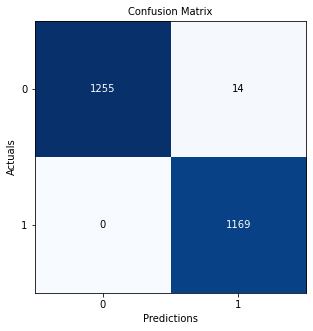

In [379]:
## plot a confusion matrix

fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [380]:
## With only the feature odor the decision tree classifier accuracy is high at 98.5% in model 1
## Adding spore-print-color and gill-color gives an even higher accuracy of 99.4%
## The 2 models are highly accurate, almost perfect with only 35 false negative predictions in model 1 and 14 false negative predictions in model 2
## Both have 0 false positive results meaning there are no wrong predictions there

In [381]:
# TPR = TP / (TP + FN)

In [382]:
print('TPR Model 1:', 1255/(1255+35))
print('TPR Model 2:', 1255/(1255+14))

TPR Model 1: 0.9728682170542635
TPR Model 2: 0.9889676910953507


In [383]:
## similar accuracy, but more accurate with the other 2 features in the model